## Apples-to-apples performance comparison with AlpaGasus

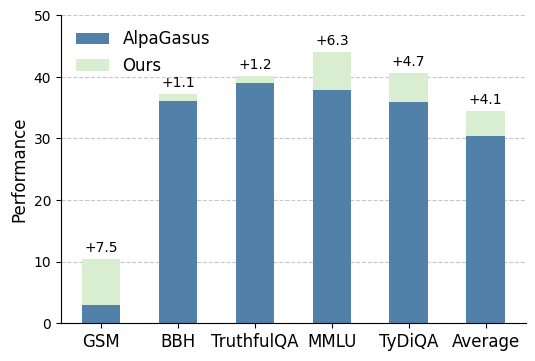

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["GSM", "BBH", "TruthfulQA", "MMLU", "TyDiQA", "Average"]
alpagasus_scores = np.array([3.0, 36.1, 39.0, 37.8, 35.9, 30.4])
ours_scores = np.array([10.5, 37.2, 40.2, 44.1, 40.6, 34.5])
diff_perc_scores = (ours_scores - alpagasus_scores) / alpagasus_scores * 100  # 计算提升的差值
diff_scores = ours_scores - alpagasus_scores  # 计算提升的差值

x = np.arange(len(categories))  # 横坐标索引
width = 0.5  # 柱子宽度增加，使其类似拼接的效果

fig, ax = plt.subplots(figsize=(6, 4))  # 调整整个图的比例缩小
colors = ['#5180a9', '#d9edd1']  # 调整配色

# 绘制堆叠柱状图
rects1 = ax.bar(x, alpagasus_scores, width, label='AlpaGasus', color=colors[0])
rects2 = ax.bar(x, diff_scores, width, label='Ours', color=colors[1], bottom=alpagasus_scores)

# 添加标签和标题
ax.set_ylabel('Performance', fontsize=12)
# ax.set_title('Apples-to-apples comparison', fontsize=18, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
legend = ax.legend(fontsize=12)
legend.get_frame().set_linewidth(0)
legend.set_zorder(0)

# 只保留横线的网格，且设置在最底层
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax.xaxis.grid(False)

# 仅保留 x 和 y 轴的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 50)
ax.tick_params(axis='y', labelsize=10)

# 确保柱状图在网格线之上
for rect in rects1 + rects2:
    rect.set_zorder(2)

# 添加数值标签（标注提升部分）
for rect1, rect2, diff in zip(rects1, rects2, diff_scores):
    height = rect1.get_height() + rect2.get_height()

    ax.annotate(f'+{diff:.1f}',
                xy=(rect1.get_x() + rect1.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

plt.show()
# apple_to_apple_comparison